## Importing necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\hp\Downloads\Practise\Dataset\train.csv')

In [7]:
cat_col = []

for i in data.columns:
    if data[i].dtype == "object":
        cat_col.append(i)

cat_col

['URL', 'Domain', 'TLD', 'Title']

In [8]:
data.drop(columns=cat_col, inplace=True)

In [9]:
data.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,21,15,0,77.884615,1.000000,0.000226,0.042026,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,26,20,0,70.358456,1.000000,0.038420,0.067404,3,1,0,...,0,0,0,0,0,1,1,0,1,0
2,170,51,0,6.156148,0.250000,0.009442,0.048233,2,2,0,...,0,0,1,1,2,10,0,0,27,0
3,23,16,0,100.000000,0.777778,0.001840,0.063681,2,2,0,...,1,0,1,34,5,5,21,0,24,1
4,22,6,0,46.122449,1.000000,0.000138,0.029425,2,0,0,...,0,0,0,1,0,0,0,0,3,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state = 45)

In [12]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((115539, 50), (49517, 50), (115539,), (49517,))

In [13]:
model = RandomForestClassifier()

model.fit(xtrain, ytrain)

RandomForestClassifier()

In [14]:
predcitions = model.predict(xtest)

In [15]:
print(f"Accuracy of the Random Forest Model is {accuracy_score(ytest, predcitions)}")

Accuracy of the Random Forest Model is 1.0


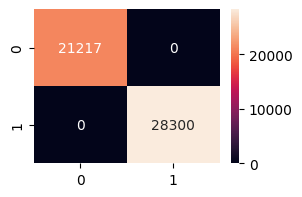

In [19]:
cm = confusion_matrix(ytest, predcitions)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()